## How do we train a multilayer neural network?

#### In order to enable higher accuracy, we need to give more freedom to the neural network.
This means that a neural network needs more than one layer to extract the underlying
patterns in the training data. Let's create a multilayer neural network to achieve that.

In [1]:
import numpy as np
import pylab as pl

#### Generate some sample data points based on the equation y = 3x^2 + 5 and then normalize the points:

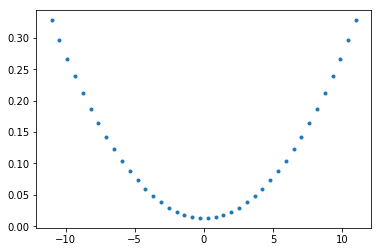

In [2]:
# Generate some training data
min_value = -11
max_value = 11
num_points = 40
x = np.linspace(min_value, max_value, num_points)
y = np.square(x) + 5
y = y / np.linalg.norm(y)

#### Reshape the above variables to create a training dataset:

In [14]:
num_samples = len(x) # 40

# Create data and labels
input_data = x.reshape(num_samples, 1)
output_labels = y.reshape(num_samples, 1)
print(output_labels)

[[0.32829659]
 [0.29679042]
 [0.26694248]
 [0.23875275]
 [0.21222124]
 [0.18734795]
 [0.16413288]
 [0.14257603]
 [0.12267739]
 [0.10443698]
 [0.08785479]
 [0.07293082]
 [0.05966506]
 [0.04805753]
 [0.03810821]
 [0.02981711]
 [0.02318424]
 [0.01820958]
 [0.01489314]
 [0.01323492]
 [0.01323492]
 [0.01489314]
 [0.01820958]
 [0.02318424]
 [0.02981711]
 [0.03810821]
 [0.04805753]
 [0.05966506]
 [0.07293082]
 [0.08785479]
 [0.10443698]
 [0.12267739]
 [0.14257603]
 [0.16413288]
 [0.18734795]
 [0.21222124]
 [0.23875275]
 [0.26694248]
 [0.29679042]
 [0.32829659]]


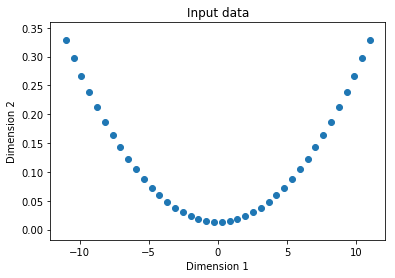

In [17]:
# Plot input data
pl.figure(0)
pl.scatter(input_data, output_labels)
pl.xlabel('Dimension 1')
pl.ylabel('Dimension 2')
pl.title('Input data')
pl.plot(x, y, '.')
pl.show()

#### It’s a simple parabola.<br/>
An important thing to note is that we have normalized the output values. <br/>This is a very important step when you are preparing the training data for neural network. <br/>
<b>Always make sure your labels are normalized.</b>

#### Let’s create a neural network with 1 hidden layer. <br/>Technically, the output values are also considered as “layers”, so we need to create a network with 2 layers here:<br/>
Let's have 10 neurons in the first layer

In [18]:
import neurolab as nl

# Hidden layer consists of 10 neurons
# Output layer consists of 1 neuron
# Create a feed-forward backpropagation network
# The network's input ranges from [-11 to 11].
multilayer_net = nl.net.newff([[min_value, max_value]], [10, 1])

In [19]:
# Set the training algorithm to gradient descent and train the network:
multilayer_net.trainf = nl.train.train_gd

# The number of epochs refers to the number of iterations of the full 
# training dataset that the network would go through before it stops. 
# “show” - shows the progress every 100 epochs. 
# “goal” - specifies the maximum permissible error. 
# Once the error goes below this value, the network stops training 
# even if the maximum number of epochs is not reached. 
error = multilayer_net.train(input_data, output_labels, epochs=500, show=100, goal=0.03)

Epoch: 100; Error: 0.7662439693878356;
Epoch: 200; Error: 0.37446465142582186;
Epoch: 300; Error: 0.21095124872205434;
Epoch: 400; Error: 0.13378230206819117;
Epoch: 500; Error: 0.09448592566757022;
The maximum number of train epochs is reached


#### As you can see in this case, the error didn’t converge after 500 epochs.

#### To overcome this, let’s add another hidden layer:

In [5]:
# The network consists of 2 hidden layers with 10 neurons each.
multilayer_net = nl.net.newff([[min_value, max_value]], [10, 10, 1])

#### When you make this change, you will see that the maximum error satisfies our constraint. 

In [6]:
# Set the training algorithm to gradient descent and train the network:
multilayer_net.trainf = nl.train.train_gd
error = multilayer_net.train(input_data, output_labels, epochs=500, show=100, goal=0.03)

Epoch: 100; Error: 0.09427956421659067;
The goal of learning is reached


#### Predict the output for the training inputs and see how the network performs.

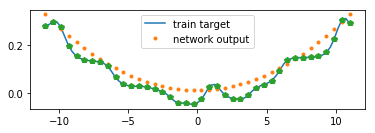

In [7]:
predicted_output = multilayer_net.sim(input_data)
x2 = np.linspace(-11, 11, 80)
y2 = multilayer_net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
y3 = predicted_output.reshape(num_samples)
pl.figure(1)
pl.subplot(212)
pl.plot(x2, y2, '-', x, y, '.', x, y3, 'p')
pl.legend(['train target', 'network output'])
pl.show()

#### As you can see, it’s close but not close enough! <br/>Let’s reduce the maximum allowed error to 0.001 and the number of epochs to 1000:

In [8]:
error = multilayer_net.train(input_data, output_labels, epochs=1000, show=100, goal=0.001)

Epoch: 100; Error: 0.015387981095440824;
Epoch: 200; Error: 0.0149360856544692;
Epoch: 300; Error: 0.016019779713999108;
Epoch: 400; Error: 0.013297812243106114;
Epoch: 500; Error: 0.009606889902825913;
Epoch: 600; Error: 0.00735404886552251;
Epoch: 700; Error: 0.006266528508423341;
Epoch: 800; Error: 0.00588354999000761;
Epoch: 900; Error: 0.005984886666992779;
Epoch: 1000; Error: 0.006412934438584334;
The maximum number of train epochs is reached


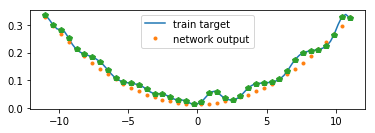

In [9]:
predicted_output = multilayer_net.sim(input_data)
x2 = np.linspace(-11, 11, 80)
y2 = multilayer_net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
y3 = predicted_output.reshape(num_samples)
pl.figure(1)
pl.subplot(212)
pl.plot(x2, y2, '-', x, y, '.', x, y3, 'p')
pl.legend(['train target', 'network output'])
pl.show()

#### The predicted outputs are much closer to the actual output in this case.